Example of a script that calculates the instantaneous angular distribution of synchrotron radiation from a 80 MeV electron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#electron rest mass
m0 = 0.51099895000 #MeV
#kinetic energy
ke = 80.0 #MeV
#relativistic parameters
en = ke + m0
gam = en/m0
bet = np.sqrt(1-gam**(-2))

#Make a grid for theta and phi
phnum = 100
thnum = 50
#linspace uniformly distributes points within a range
#(like np.arange, except you specify the length instead of the step-size)
ph_list = np.linspace(0,2*np.pi,phnum)
#The beam is ultrarelativistic, so theta must be small
th_list = np.linspace(0,0.005*np.pi,thnum)

This is the explicit way to do it.

In [2]:
#define a 2D array for the radiated power
Rad = np.zeros((phnum,thnum))
#calculate the radiation at each point
for th_lp in range(len(th_list)):
  for ph_lp in range(len(ph_list)):
    th = th_list[th_lp]
    ph = ph_list[ph_lp]
    term = (1-bet*np.cos(th))
    #this is the formula for synchrotron radiation
    Rad[ph_lp,th_lp] = (term**(-3))*( 1-(((np.sin(th)*np.cos(ph))/(gam*term))**2) )


This is the shortcut way to do it.

In [3]:
th, ph = np.meshgrid(th_list, ph_list)
Rad = ((1-bet*np.cos(th))**(-3))*( 1-((np.sin(th)*np.cos(ph))/(gam*(1-bet*np.cos(th))))**2 )

Now to plot this with the magnitude of radiation in color...

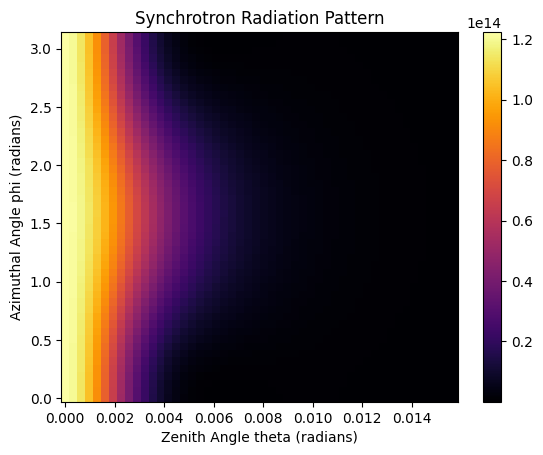

In [4]:
#I only want to plot 0 to pi, not 0 to 2pi, so let's only use the first half of ph_list
phnum2 = int(phnum/2)

#axises must be listed in x y order, but indices must be listed in y x order
#the default colormap is great, but here is another colormap
plt.pcolormesh(th_list, ph_list[0:phnum2], Rad[0:phnum2,:], cmap='inferno')
plt.xlabel('Zenith Angle theta (radians)')
plt.ylabel('Azimuthal Angle phi (radians)')
plt.title('Synchrotron Radiation Pattern')
plt.colorbar()
plt.savefig('day1_synchlight_1.png', bbox_inches='tight')
plt.show()

Since this information is angular, it should really be plotted on a polar project

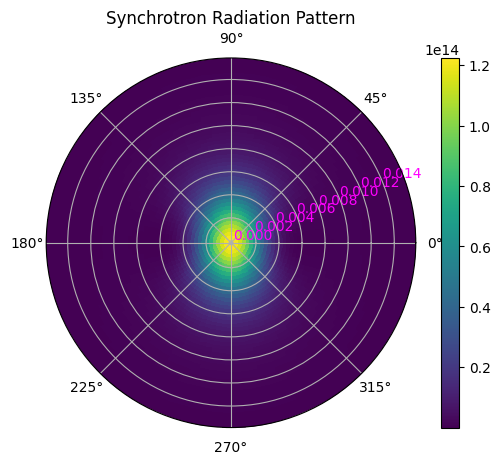

In [14]:
ax = plt.subplot(1,1,1, projection='polar')
#using theta as the radial coordinate, so it must go second
#because theta bow goes second, I have to take the transpose of Rad
plt.pcolormesh(ph_list, th_list, Rad.T)
plt.title('Synchrotron Radiation Pattern')
#decided not to use axis titles, since we are essentially forming a picture.
#but it's helpful to indicate the scale of theta, so we can leave the numbers
#that axis overlaps the figure, so lets use magenta
ax.xaxis.label.set_color('magenta')
ax.tick_params(axis='y', colors='magenta', labelsize=10)
plt.colorbar()
plt.savefig('day1_synchlight_2.png', bbox_inches='tight')
plt.show()
